In [225]:
import pandas as pd
from sklearn import cluster, metrics, mixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.graph_objs as go
from scipy.stats import shapiro, kruskal, f_oneway, mannwhitneyu
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

## **3. Моделирование**

In [226]:
df_n = pd.read_csv('data/social_russia_data/social_russia_data_norm1.csv', index_col='region')
df = pd.read_csv('data/social_russia_data/social_russia_data.csv', index_col='region')
df.head()

,per_capita,child_mortality/newborn,disabled/population,morbidity,poverty_percent,welfare/population,poverty: children,poverty: retired,poverty: employable,housing: bad condition,housing: area,housing: n_room,population,gross/population,region_prod/population,retail,newborn/population,budget/population,part children,part retired
region,,,,,,,,,,,,,,,,,,,,
"Адыгея, республика",30293.0,0.317,7.065,66252.3,12.5,1540.19,44.6,5.4,50.1,27.4,27.0,3.1,463088.0,309184.1,263.51,231447.0,0.95,76247.0,19.2,25.3
"Алтай, республика",21677.0,0.745,9.572,89433.5,23.8,2656.65,44.5,2.9,52.6,9.3,19.5,2.4,220181.0,283451.4,79.13,135351.0,1.34,134174.0,28.2,17.9
Алтайский край,23864.0,0.486,7.411,112764.7,17.5,1977.39,31.4,9.2,59.4,13.4,25.9,2.4,2317153.0,291156.9,367.88,153605.0,0.86,66579.0,18.9,26.6
Амурская область,35499.0,0.535,8.088,83412.0,15.2,2888.17,38.4,4.7,56.9,16.8,23.2,2.3,790044.0,571362.1,512.09,245233.0,0.99,133095.0,20.3,22.6
Архангельская область,34852.0,0.348,7.755,99842.1,12.3,2219.51,28.5,7.2,64.3,14.5,24.6,2.4,1092424.0,514200.4,607.92,250033.0,0.82,103716.0,18.6,26.2


In [227]:
def plot_metrics(X, al='kmeans', n=df_n.shape[1]+1):
    """Расчет внутренних мер кластеризации в зависимости от числа кластеров"""
    inertia = []
    silhouette = []
    calinski_harabasz = []
    davis_bouldin = []
    #n = X.shape[1]+1
    for n_cl in range(2, n):
        if al=='kmeans':
            alg = cluster.KMeans(n_clusters=n_cl, random_state=42).fit(X)
            labels = alg.labels_
            
        if al == 'em':
            alg = mixture.GaussianMixture(n_components=n_cl , random_state = 42 ).fit(X)
            labels = alg.predict(X)
        
        if al == 'ac':
            alg = cluster.AgglomerativeClustering(n_clusters=n_cl, linkage='ward')
            labels = alg.fit_predict(X)
    
        if al=='kmeans': inertia.append(alg.inertia_)
        silhouette.append(metrics.silhouette_score(X, labels))
        calinski_harabasz.append(metrics.calinski_harabasz_score(X, labels))
        davis_bouldin.append(metrics.davies_bouldin_score(X, labels))
        print(f'n_cl={n_cl}, {silhouette[-1]} ')
        
    fig, ax = plt.subplots(1, 4, figsize=(24,5))
    if al=='kmeans': ax[0].plot(range(2, n), inertia, 's-', label='inertia')
    ax[1].plot(range(2, n), silhouette, 's-', label='silhouette')
    ax[2].plot(range(2, n), calinski_harabasz, 's-', label='calinski-harabasz')
    ax[3].plot(range(2, n), davis_bouldin, 's-', label='davis-bouldin')
    ax[0].legend(prop={'size': 16})
    ax[1].legend(prop={'size': 16})
    ax[2].legend(prop={'size': 16})
    ax[3].legend(prop={'size': 16});
    fig.supxlabel('n labelss')

In [228]:
def plot_results(X, labels=[], title=''):
    "Plotting a 2D t-SNE representation and calculated metrics"
    """tsne = TSNE(n_components=2, perplexity=50, init='pca',
                learning_rate='auto', random_state=42)
    df_tsne = pd.DataFrame(tsne.fit_transform(X))
    df_tsne['labels] = labels"""
    if X.shape[1] == 2:
        fig = plt.figure()
        sns.scatterplot(x=X[0], y=X[1], hue=labels, palette='bright')
        fig.suptitle(title, fontsize=14);

    print('Silhouette: {:.3f}'.format(
        metrics.silhouette_score(X, labels)))
    print('Calinski-Harabatz: {:.3f}'.format(
        metrics.calinski_harabasz_score(X, labels)))
    print('Davis-Bouldin: {:.3f}'.format(
        metrics.davies_bouldin_score(X, labels)))
    print(f'Rand score (сравнение с базовой моделью): {metrics.rand_score(labels_base, labels)}')


Рассмотрим в качестве базовой модель k-Means 

n_cl=2, 0.5369054060551526 
n_cl=3, 0.45049346129729567 
n_cl=4, 0.22459881826663194 
n_cl=5, 0.2524258600523415 
n_cl=6, 0.24982854236226318 
n_cl=7, 0.23982456217903414 
n_cl=8, 0.23974406101926363 
n_cl=9, 0.17294638693843672 
n_cl=10, 0.16614775859334 


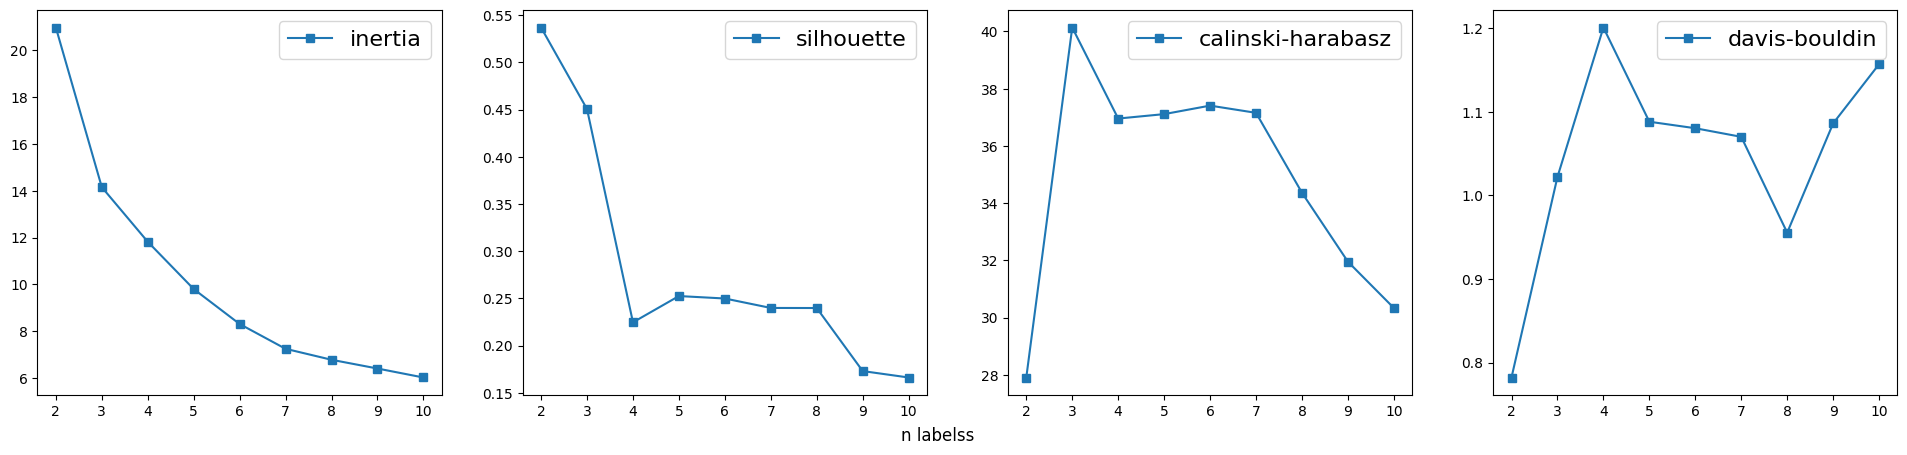

In [229]:
plot_metrics(df_n)

Опртимальное соотношение клоичества кластеров и качества достигается при числе кластеров равным три, но этого мало для данной работы.
Зафиксируем метрики для этого числа кластеров

In [230]:
kmeans= cluster.KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_n)
labels_base = kmeans.labels_
plot_results(df_n, labels_base, title='KMeans n_clusters=3')

Silhouette: 0.450
Calinski-Harabatz: 40.139
Davis-Bouldin: 1.022
Rand score (сравнение с базовой моделью): 1.0


Попробуем снизить размерность и поискать модель с большим количеством кластеров

### **3.1 Снижение размерности PCA**

In [231]:
pipeline = Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('pca', PCA(n_components=4))
    ])
df_pca = pipeline.fit_transform(df)
pipeline['pca'].n_components_


4

In [232]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_n)
print(f'Число главных компонент: {pca.n_components_}')
df_pca=pd.DataFrame(df_pca)

Число главных компонент: 4


Для сохранения особеностей выборки на 90% и более - оптимально понизить размерность до 4 компонент

#### **3.1.1 K-means**

n_cl=2, 0.5588342126987654 
n_cl=3, 0.4853016764310033 
n_cl=4, 0.32826484455297106 
n_cl=5, 0.3182646175073317 
n_cl=6, 0.33579898917259693 
n_cl=7, 0.30696942170476854 
n_cl=8, 0.30204193109152205 
n_cl=9, 0.25341103964979395 
n_cl=10, 0.24850465309993214 


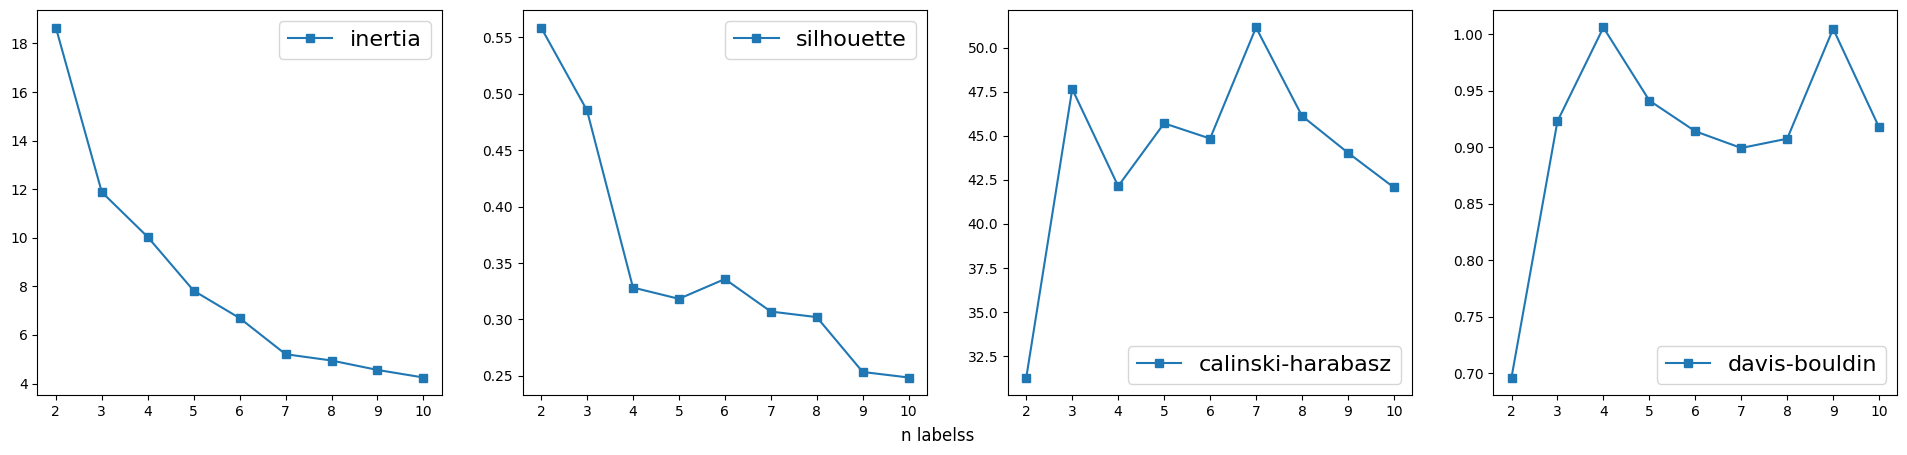

In [233]:
plot_metrics(df_pca, al='kmeans')

При числе кластеров более 3 качество кластеризации становится заметно хуже базового

In [234]:
kmeans_pca= cluster.KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(df_pca)
labels_kmeans_pca = kmeans_pca.labels_
plot_results(df_pca, labels_kmeans_pca, title='PCA KMeans n_clusters=3')

Silhouette: 0.485
Calinski-Harabatz: 47.659
Davis-Bouldin: 0.923
Rand score (сравнение с базовой моделью): 1.0


#### **3.1.2 EM алгоритм**

n_cl=2, 0.32420580187121484 


n_cl=3, 0.345491556082224 
n_cl=4, 0.30971348405431304 
n_cl=5, 0.2807678988403785 
n_cl=6, 0.2706991478618882 
n_cl=7, 0.21055386978187146 
n_cl=8, 0.24327533198453885 
n_cl=9, 0.19326367196424424 
n_cl=10, 0.18766247834696978 


/tmp/ipykernel_1374248/3544226590.py:32: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



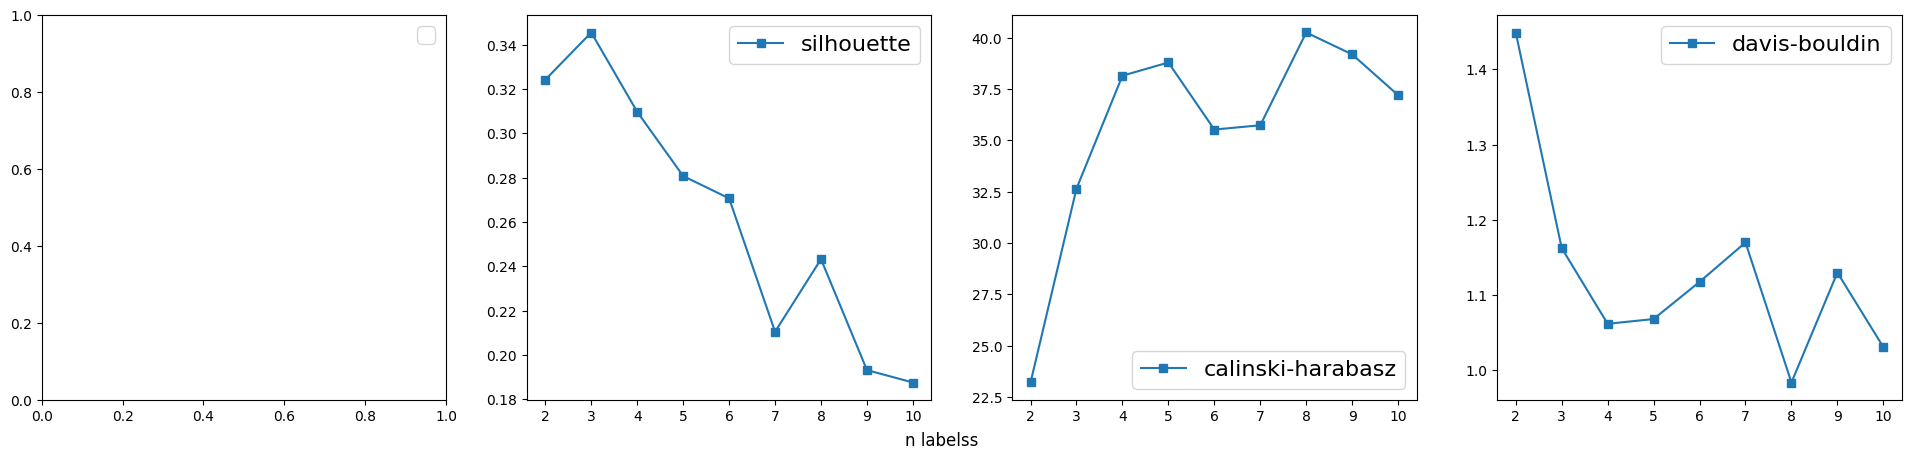

In [235]:
plot_metrics(df_pca, al='em');

Аналогично как с k-means: нет смысла в увеличение числа кластеров

In [236]:
gm_pca = mixture.GaussianMixture(n_components=3 , random_state = 42 ).fit(df_pca)
labels_gm_pca = gm_pca.predict(df_pca)
plot_results(df_pca, labels_gm_pca, 'PCA -EM 3 components')

Silhouette: 0.345
Calinski-Harabatz: 32.646
Davis-Bouldin: 1.163
Rand score (сравнение с базовой моделью): 0.8156862745098039


#### **3.1.3 Агломеративная иерархическая кластеризация**

n_cl=2, 0.3900088918883734 
n_cl=3, 0.43451308165972324 
n_cl=4, 0.359954565382692 


n_cl=5, 0.3585438592071714 
n_cl=6, 0.2679960697216285 
n_cl=7, 0.2766058049719599 
n_cl=8, 0.27552788749741614 
n_cl=9, 0.2420125106876169 
n_cl=10, 0.2350946066241348 


/tmp/ipykernel_1374248/3544226590.py:32: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



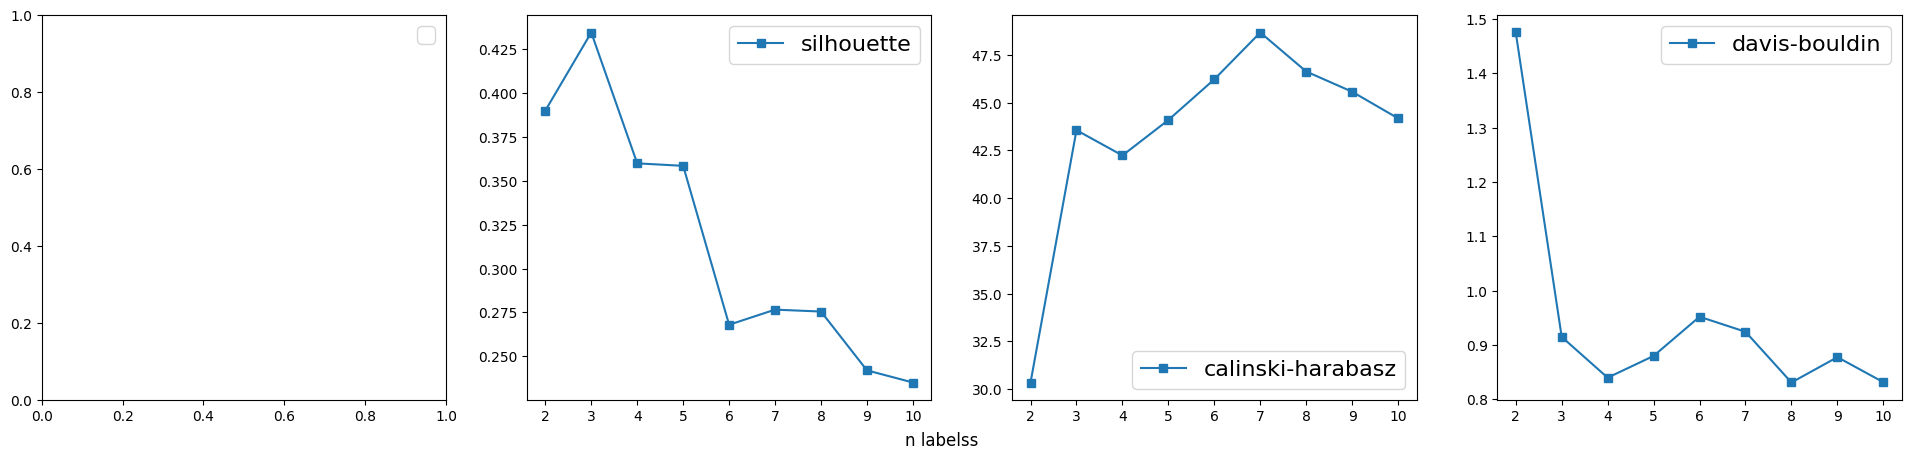

In [237]:
plot_metrics(df_pca, al='ac');

In [238]:
ac_pca = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ac_pca = ac_pca.fit_predict(df_pca)
plot_results(df_pca, labels_ac_pca, 'PCA -AC 3 components')

Silhouette: 0.435
Calinski-Harabatz: 43.552
Davis-Bouldin: 0.915
Rand score (сравнение с базовой моделью): 0.8829131652661064


Выигрыша от линейного понижения размерности не получилось, попробуем снизить размерность нелинейно

### **3.2 Понижение размерности T-SNE**

In [239]:
tsne = TSNE(n_components=2)#, perplexity=50)
X_tsne = tsne.fit_transform(df_n)
df_tsne=pd.DataFrame(X_tsne)

#### **3.2.1 K-means**

n_cl=2, 0.43400806188583374 
n_cl=3, 0.4063405990600586 


n_cl=4, 0.3933408260345459 
n_cl=5, 0.4331795573234558 
n_cl=6, 0.3798247277736664 
n_cl=7, 0.3502205014228821 
n_cl=8, 0.39902228116989136 
n_cl=9, 0.411215215921402 
n_cl=10, 0.4046524465084076 


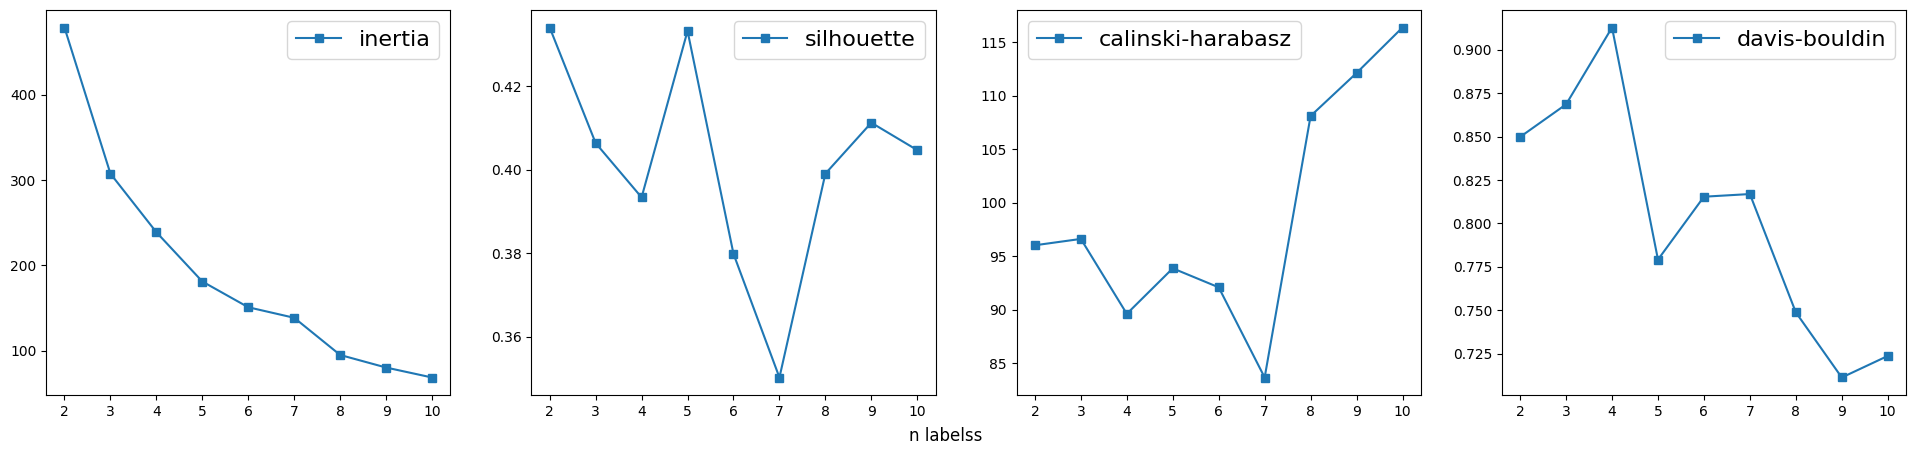

In [240]:
plot_metrics(df_tsne, al='kmeans')

Silhouette: 0.433
Calinski-Harabatz: 93.861
Davis-Bouldin: 0.779
Rand score (сравнение с базовой моделью): 0.6002801120448179


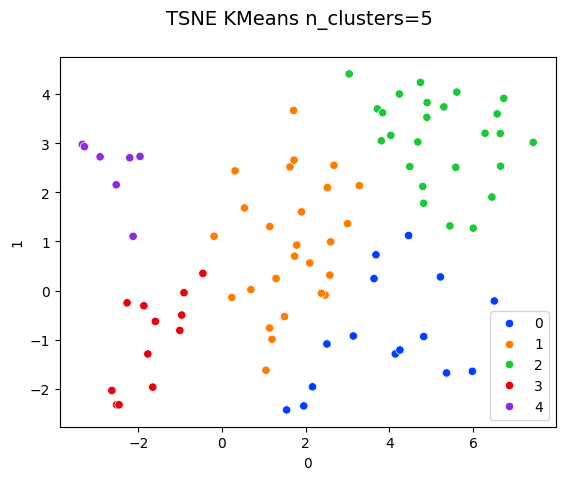

In [241]:
kmeans_tsne= cluster.KMeans(n_clusters=5, random_state=42)
kmeans_tsne.fit(df_tsne)
labels_kmeans_tsne=kmeans_tsne.labels_
plot_results(df_tsne, labels_kmeans_tsne, title='TSNE KMeans n_clusters=5')

Удалось увеличить количество кластеров до 5 и повысить качество

#### **3.2.2 EM алгоритм**

n_cl=2, 0.3532360792160034 
n_cl=3, 0.3491290509700775 
n_cl=4, 0.3855888247489929 
n_cl=5, 0.40767714381217957 
n_cl=6, 0.3720581531524658 
n_cl=7, 0.34224650263786316 
n_cl=8, 0.39225253462791443 
n_cl=9, 0.40757209062576294 
n_cl=10, 0.34793761372566223 


/tmp/ipykernel_1374248/3544226590.py:32: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



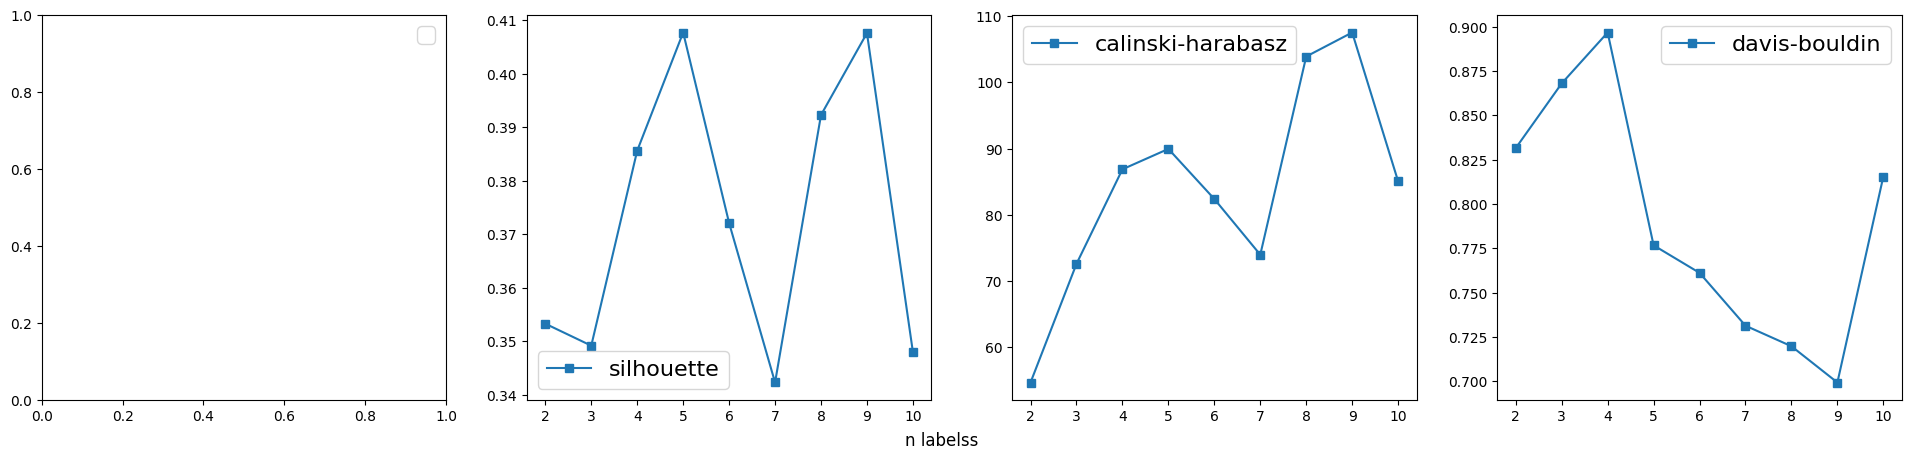

In [242]:
plot_metrics(df_tsne, al='em');

Хорошее качество набдюдается при количестве кластеров 5 и 9, возьмем 9, что лучше отследить особенности групп

Silhouette: 0.408
Calinski-Harabatz: 107.540
Davis-Bouldin: 0.699
Rand score (сравнение с базовой моделью): 0.48935574229691875


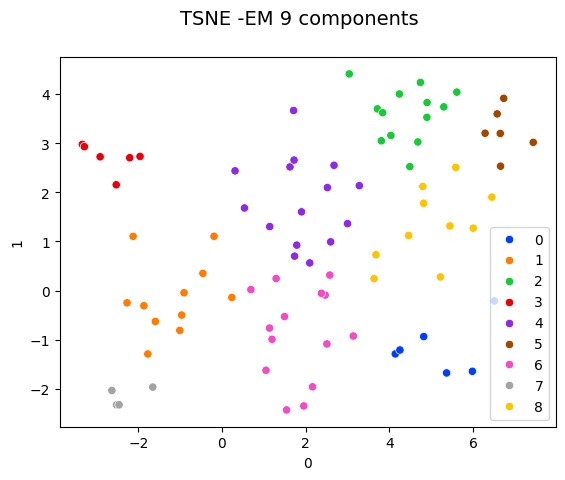

In [243]:
gm_tsne = mixture.GaussianMixture(n_components = 9 , random_state = 42 ).fit(df_tsne)
labels_em_tsne = gm_tsne.predict(df_tsne)
plot_results(df_tsne, labels_em_tsne, 'TSNE -EM 9 components')

#### **3.2.3 Агломеративная иерархическая кластеризация**

n_cl=2, 0.4184708595275879 
n_cl=3, 0.37489232420921326 
n_cl=4, 0.37340158224105835 
n_cl=5, 0.3992997109889984 
n_cl=6, 0.41047337651252747 
n_cl=7, 0.4059530794620514 
n_cl=8, 0.41647017002105713 
n_cl=9, 0.4011705219745636 
n_cl=10, 0.3924431800842285 


/tmp/ipykernel_1374248/3544226590.py:32: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



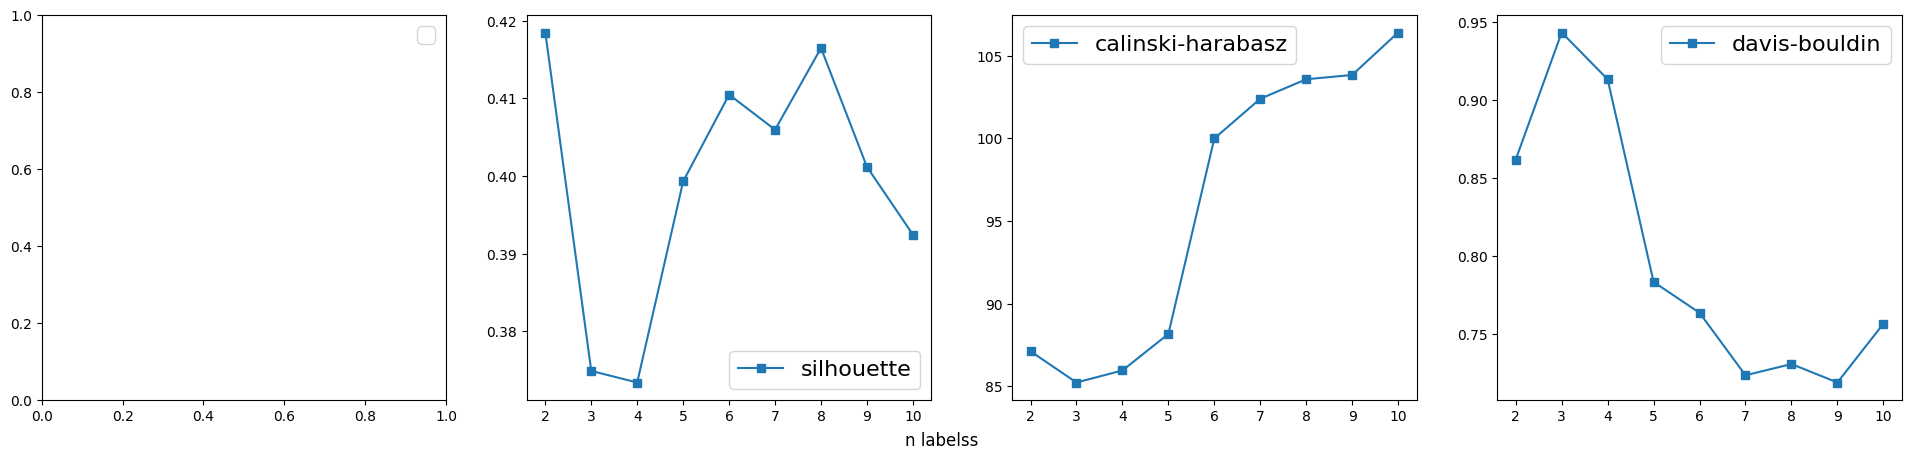

In [244]:
plot_metrics(df_tsne, al='ac');

Silhouette: 0.416
Calinski-Harabatz: 103.572
Davis-Bouldin: 0.731
Rand score (сравнение с базовой моделью): 0.5014005602240896


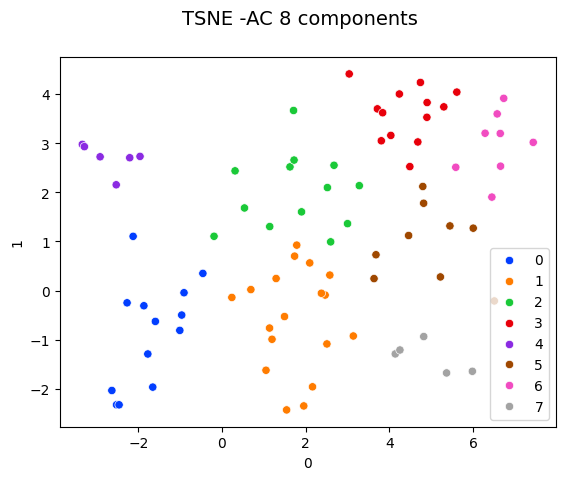

In [245]:
ac_tsne = cluster.AgglomerativeClustering(n_clusters=8, linkage='ward')
labels_ac_tsne = ac_tsne.fit_predict(df_tsne)
plot_results(df_tsne, labels_ac_tsne, 'TSNE -AC 8 components')

## **4.  Анализ результатов кластеризации**

### **4.1 Полярные диаграммы** 

In [246]:
def plot_cluster_profile(labels, n_clusters):
    """ Полярная диаграмма"""
    df0 = df_n.copy()
    df0['labels'] = labels
    grouped_data = df0.groupby(by='labels')[df_n.columns].mean()
    # Создаем список признаков
    features = grouped_data.columns
    # Создаем пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаем полярную диаграмму и добавляем ее на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название - номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()
    

Построим полярную диаграмму для базовой модели k-Means с числом кластеров 3. Это было оптимальное соотношение качества и количества кластеров 

#### **4.1.1 Base модель K-means, n кластеров = 3**

In [247]:
plot_cluster_profile(labels_base, 3 )
df_n_kmeans_pca = df_n.copy()
df_n_kmeans_pca['labels'] = labels_base#labels_em_tsne
df_n_kmeans_pca['labels'].value_counts()

labels
2    64
0    11
1    10
Name: count, dtype: int64

In [248]:
df_n_kmeans_pca.sort_values('labels')

,per_capita,disabled/population,poverty_percent,housing: n_room,population,gross/population,retail,newborn/population,part children,part retired,labels
region,,,,,,,,,,,
Камчатский край,0.526974,0.172176,0.364312,0.15625,0.021284,0.158094,0.423619,0.253731,0.203046,0.509901,0
Сахалинская область,0.600854,0.184868,0.107807,0.12500,0.035155,0.378549,0.804764,0.335821,0.228426,0.648515,0
"Саха (Якутия), республика",0.403294,0.289256,0.464684,0.15625,0.073444,0.202594,0.558625,0.470149,0.512690,0.316832,0
Ненецкий АО,0.920864,0.402499,0.171004,0.31250,0.000000,1.000000,0.490257,0.485075,0.502538,0.386139,0
Москва,0.826902,0.521055,0.044610,0.09375,1.000000,0.281481,1.000000,0.201493,0.000000,0.831683,0
...,...,...,...,...,...,...,...,...,...,...,...
Челябинская область,0.133482,0.369638,0.289963,0.15625,0.270878,0.064244,0.342646,0.194030,0.228426,0.757426,2
"Хакасия, республика",0.095276,0.250098,0.509294,0.28125,0.038796,0.070738,0.348820,0.223881,0.355330,0.638614,2
Хабаровский край,0.340351,0.242523,0.267658,0.15625,0.100644,0.101902,0.634787,0.253731,0.187817,0.628713,2


- 1 кластер  - северные регионы с самыми большим дозходами и Москва
- 2 кластер - регионы с низкими доходами, высокой рождаемостью, большой долей детей в населении, с большим количеством комнатв домохозяйствах, что может свидельствать о сельское местности
- 3 кластер - все показатели имеют средние значение, за исключением высокого значения доли пенсионеров

Посмотрим полярную диаграмму для наилучшего варианта: TSNE и EM кластеризации с числом клатеров 9

#### **4.1.2 TSNE EM алгоритм, n кластеров = 9**

In [270]:
plot_cluster_profile(labels_em_tsne, 9 )
df_n_em_tsne = df_n.copy()
df_n_em_tsne['labels'] = labels_em_tsne#labels_em_tsne
df_n_em_tsne['labels'].value_counts()

labels
4    15
6    14
2    13
1    11
8    10
5     6
0     6
3     6
7     4
Name: count, dtype: int64

#### **0 кластер**

Представлен экономически сильными регионами (Москва, Санкт-Петербург) с самым высокой численностью, с высокими доходами и уровнем розничной торговли, высокой инвалидностью и численностью пенсионеров,

низкой бедностью, рождаемостью и уровнем детского населения, небольшим колечеством комнат в жилом помещении, что может говорить о преобладании городского населения.


In [262]:
df_n_em_tsne[df_n_em_tsne.labels==0]

,per_capita,disabled/population,poverty_percent,housing: n_room,population,gross/population,retail,newborn/population,part children,part retired,labels
region,,,,,,,,,,,
Краснодарский край,0.273247,0.494294,0.208178,0.34375,0.445731,0.062898,0.589852,0.253731,0.192893,0.782178,0
Москва,0.826902,0.521055,0.044610,0.09375,1.000000,0.281481,1.000000,0.201493,0.000000,0.831683,0
Московская область,0.412985,0.279319,0.074349,0.12500,0.605253,0.106958,0.829289,0.246269,0.121827,0.727723,0
Санкт-Петербург,0.442568,0.774105,0.040892,0.12500,0.423774,0.163694,0.650297,0.246269,0.015228,0.826733,0
Свердловская область,0.280585,0.367867,0.156134,0.15625,0.337706,0.088085,0.584315,0.238806,0.223350,0.767327,0
"Татарстан, республика",0.256780,0.456218,0.066914,0.25000,0.305429,0.105334,0.524105,0.276119,0.218274,0.707921,0


#### **1 кластер**
На втором месте по бедности после 7 кластера (Чечня, Дагестан, Ингушетия).
Представлен регионами с низким уровнем дохода, показателем валового продукта на душу населения, оборотом розничной торговли и низким уровнем населения, рождаемости, пенсионеров.
Относительно 7 кластера чуть меньшая бедность, рождаемость, более высокие доходы, оборот торговли и численность пенсионеров.

In [269]:
df_n_em_tsne[df_n_em_tsne.labels==1]

,per_capita,disabled/population,poverty_percent,housing: n_room,population,gross/population,retail,newborn/population,part children,part retired,labels
region,,,,,,,,,,,
"Алтай, республика",0.065708,0.693231,0.706320,0.21875,0.013936,0.027893,0.236445,0.477612,0.685279,0.391089,1
"Бурятия, республика",0.126145,0.494884,0.561338,0.21875,0.074547,0.032653,0.416341,0.432836,0.482234,0.480198,1
Еврейская АО,0.152921,0.525876,0.698885,0.15625,0.009039,0.050975,0.327837,0.231343,0.319797,0.618812,1
Забайкальский край,0.139204,0.465368,0.598513,0.21875,0.080386,0.051420,0.318549,0.358209,0.406091,0.500000,1
Иркутская область,0.146391,0.603601,0.475836,0.21875,0.185776,0.096640,0.318934,0.320896,0.345178,0.613861,1
Кабардино-Балкарская республика,0.069540,0.396202,0.721190,0.50000,0.065240,0.013522,0.289872,0.388060,0.345178,0.480198,1
"Калмыкия, республика",0.040164,0.521842,0.665428,0.43750,0.017969,0.040034,0.098583,0.238806,0.365482,0.554455,1
Карачаево-Черкесская республика,0.028364,0.840811,0.684015,0.37500,0.033356,0.012889,0.091636,0.298507,0.304569,0.569307,1
"Саха (Якутия), республика",0.403294,0.289256,0.464684,0.15625,0.073444,0.202594,0.558625,0.470149,0.512690,0.316832,1


#### **2, 4, 5, 6 и 8 кластеры**
Хорошо рассматривать в группе, пользуясь полярной диаграммой.

При общей схожести - выделяется **6** с заметно более высокой рождаемостю, но с самой низкой из этой группы бедность. Можно объяснить, тем что в нем самый высокий доход на душу населения и высокая численность самого населения, высокий оборот торговли и более низкая инвалидность населения.

Из оставшихся **2 4 5** и **8** у **5** самая низкая рождаемость и как следствие самая низкая бедность, **8** очень похож, только с чуть меньшей рождаемость и как следствие бедностью. Также у **5** кластера есть отягащающее обстаятельство в виде высокой инвалидности, иначе уровень бедности был-бы ниже.

**2** и **4** очень схожи по показателям в том числе по бедности ,но у **4** более высокая рождаемость и численность населения 

#### **3 кластер**

Представлен северными регионами с самым высоким уровнем бедности, рождаемости, инвалидности, уровнем детского населения и с самым низким уровнем дохода, показателем валового продукта на душу населения

In [263]:
df_n_em_tsne[df_n_em_tsne.labels==3]

,per_capita,disabled/population,poverty_percent,housing: n_room,population,gross/population,retail,newborn/population,part children,part retired,labels
region,,,,,,,,,,,
Магаданская область,0.739032,0.104880,0.144981,0.0625,0.007602,0.373771,0.545043,0.179104,0.203046,0.539604,3
Ненецкий АО,0.920864,0.402499,0.171004,0.3125,0.000000,1.000000,0.490257,0.485075,0.502538,0.386139,3
Сахалинская область,0.600854,0.184868,0.107807,0.1250,0.035155,0.378549,0.804764,0.335821,0.228426,0.648515,3
Ханты-Мансийский АО - Югра,0.514243,0.062771,0.133829,0.1250,0.129062,0.365798,0.579404,0.395522,0.421320,0.237624,3
Чукотский АО,0.994702,0.070641,0.118959,0.0000,0.000489,0.446689,0.464788,0.276119,0.416244,0.193069,3
Ямало-Ненецкий АО,1.000000,0.000000,0.000000,0.1250,0.039602,0.973578,0.593364,0.447761,0.477157,0.039604,3


#### **7 кластер**

Представлен регионами с самым низким уровнем дохода, показателем валового продукта на душу населения, оборотом розничной торговли и низким уровнем населения, рождаемости, пенсионеров

In [266]:
df_n_em_tsne[df_n_em_tsne.labels==7]

,per_capita,disabled/population,poverty_percent,housing: n_room,population,gross/population,retail,newborn/population,part children,part retired,labels
region,,,,,,,,,,,
"Дагестан, республика",0.147623,0.717532,0.371747,0.59375,0.242738,0.019242,0.384433,0.589552,0.578680,0.158416,7
"Ингушетия, республика",0.000000,0.880854,0.936803,1.00000,0.036643,0.000000,0.000000,0.723881,0.741117,0.099010,7
"Тыва, республика",0.028679,0.378394,1.000000,0.34375,0.022421,0.021643,0.073215,0.977612,1.000000,0.054455,7
Чеченская республика,0.105666,0.881543,0.579926,0.81250,0.113552,0.005693,0.204609,1.000000,0.989848,0.000000,7


### **4.2 Boxplot** 

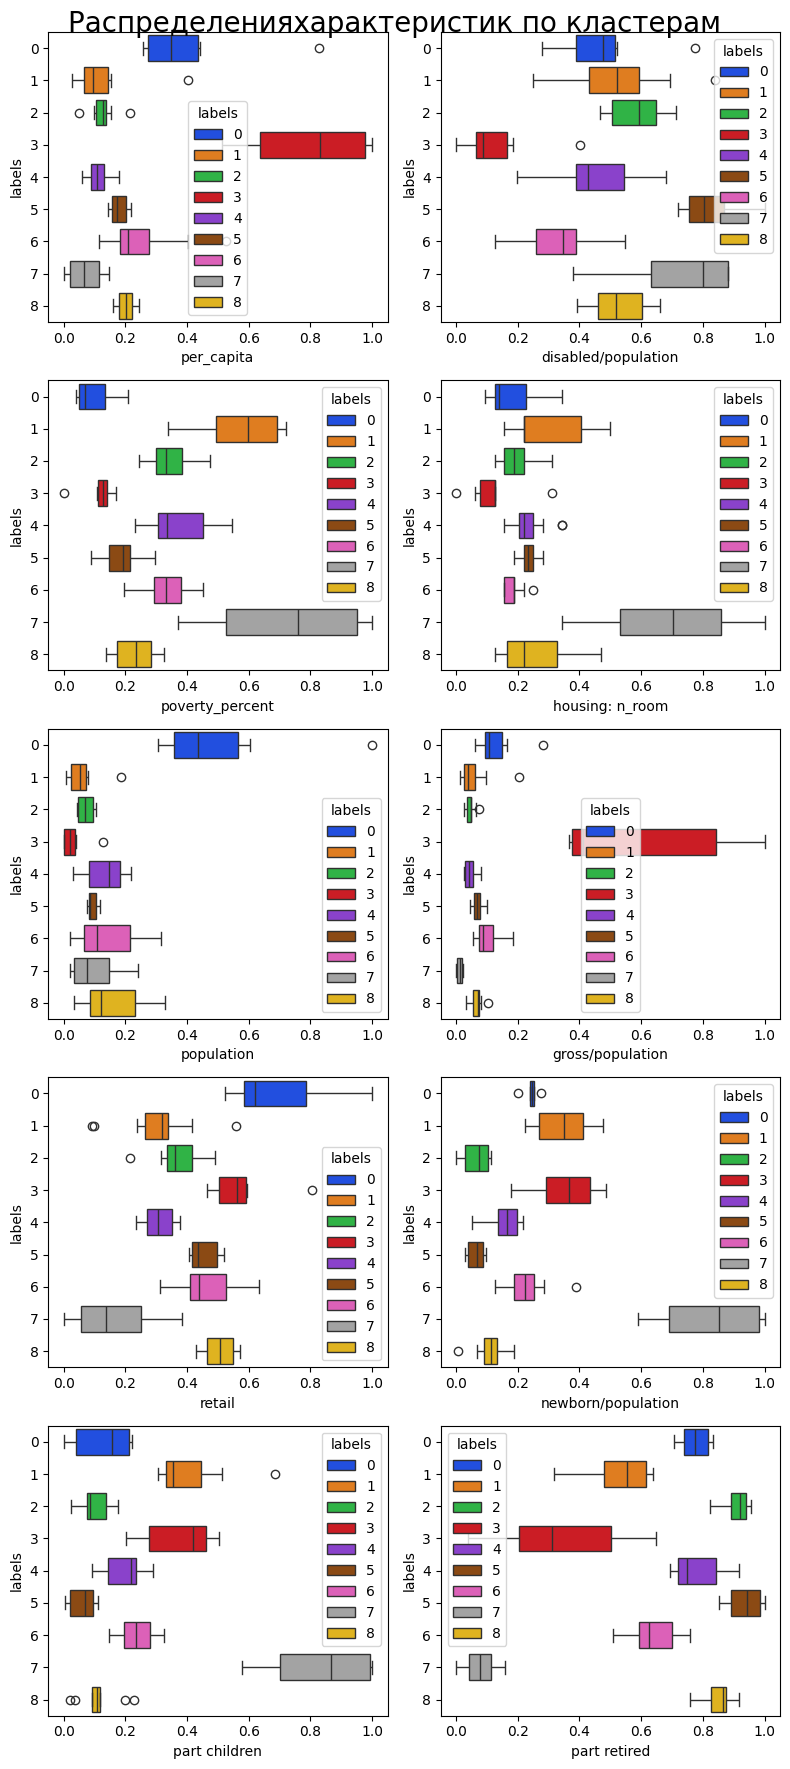

In [253]:
fig, ax = plt.subplots(5, 2, figsize=(8, 18))
df0 = df_n_em_tsne
col = df_n_em_tsne.columns[:-1]
i = 0
#mcolor={1:'red', 2:'blue', 3:'green', 4:'yellow', 5:'orange'}
for row in range(5):
    sns.boxplot(data=df0, x=col[i], y='labels', palette='bright', hue='labels', orient='h', ax=ax[row,0])
    sns.boxplot(data=df0, x=col[i+1], y='labels', palette='bright', hue='labels',  orient='h', ax=ax[row,1])
    i += 2
fig.suptitle('Распределенияхарактеристик по кластерам', fontsize=20)
plt.tight_layout()

Медианные значения показателей отличаются

In [ ]:
df_n_em_tsne.groupby(by='labels')[col[:-1]].agg(['mean', 'median']).round(2)

per_capita        disabled/population        poverty_percent         \
             mean median                mean median            mean median   
labels                                                                       
0            0.42   0.35                0.48   0.48            0.10   0.07   
1            0.12   0.10                0.51   0.52            0.58   0.60   
2            0.13   0.13                0.58   0.59            0.35   0.33   
3            0.79   0.83                0.14   0.09            0.11   0.13   
4            0.11   0.11                0.46   0.43            0.37   0.33   
5            0.18   0.17                0.83   0.80            0.19   0.19   
6            0.25   0.21                0.34   0.35            0.33   0.33   
7            0.07   0.07                0.71   0.80            0.72   0.76   
8            0.20   0.20                0.53   0.52            0.23   0.23   

       housing: n_room        population        gross/population         \
                  mean median       mean median             mean median   
labels                                                                    
0                 0.18   0.14       0.52   0.43             0.13   0.11   
1                 0.29   0.22       0.06   0.05             0.06   0.04   
2                 0.20   0.19       0.07   0.07             0.05   0.05   
3                 0.12   0.12       0.04   0.02             0.59   0.41   
4                 0.23   0.22       0.13   0.15             0.05   0.04   
5                 0.23   0.23       0.09   0.09             0.07   0.07   
6                 0.19   0.19       0.14   0.11             0.10   0.09   
7                 0.69   0.70       0.10   0.08             0.01   0.01   
8                 0.26   0.22       0.15   0.12             0.07   0.07   

       retail        newborn/population        part children         
         mean median               mean median          mean median  
labels                                                               
0        0.70   0.62               0.24   0.25          0.13   0.16  
1        0.30   0.32               0.34   0.35          0.40   0.36  
2        0.37   0.36               0.06   0.07          0.10   0.09  
3        0.58   0.56               0.35   0.37          0.37   0.42  
4        0.31   0.31               0.16   0.16          0.20   0.22  
5        0.45   0.43               0.06   0.07          0.06   0.07  
6        0.46   0.44               0.23   0.22          0.24   0.24  
7        0.17   0.14               0.82   0.85          0.83   0.87  
8        0.51   0.51               0.11   0.11          0.11   0.11

Выбросов нет, средние и медианные значения близки

## **5. Статистическая значимость различий между группами**


In [ ]:
def test_norm(df):
    """Тестирование на нормальность
    returns: l_s - списокстолбцов для нормализации
             l_n- сисок столбцов для стандартизации"""
    l_s = []
    l_n=[]
    for col in df.columns[:-1]:
        _, p = shapiro(df[col])
        if p>0.05: 
            l_s.append(col)
            print(f'{col}:p-value = {p:.3f}')
        else: l_n.append(col)
    return l_s, l_n
    

In [ ]:
l_s, l_n = test_norm(df_n_em_tsne)

disabled/population:p-value = 0.902


Только один признак расределен нормально

In [ ]:
#признаки с ненормальным распределением
l_n

['per_capita',
 'poverty_percent',
 'housing: n_room',
 'population',
 'gross/population',
 'retail',
 'newborn/population',
 'part children',
 'part retired']

$H_0$ - различие распределений в кластерах не значимое. 
$H_1$ - различие распределений в группах статистически значимо.

Для признака с нормальным распределением применем тест -однофакторный дисперсионный анализ f_oneway

In [ ]:
alpha = 0.05 #уровень значимости
n_clusters= 9
# вычисляем результат T-теста для выборок
l_df = [df_n_em_tsne['disabled/population'][df_n_em_tsne['labels']==i] for i in range(n_clusters)] 
results = f_oneway(* l_df)
print('p-value:', round(results.pvalue, 6))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.0
Отвергаем нулевую гипотезу в пользу альтернативной


Для остальных признаков распределения не являются нормальными, а количество сравниваемых групп больше двух. В этом случае можно применить непараметрический критерий Краскела-Уоллиса

In [ ]:
alpha = 0.05 #уровень значимости
def kruskal_pvalue(df, col):
    "p-value для заданной колонки (значимость различий по 4-м кластерам)"
    l_df = [df[col][df['labels']==i] for i in range(n_clusters)] 
    _, p = kruskal(*l_df)
    return p

n_cluster = df_n_em_tsne.labels.nunique()
for col in l_n:
    print(f'{col}:   p-value = {kruskal_pvalue(df_n_em_tsne, col):.10f}')
    

per_capita:   p-value = 0.0000000012
poverty_percent:   p-value = 0.0000000002
housing: n_room:   p-value = 0.0004249312
population:   p-value = 0.0000143115
gross/population:   p-value = 0.0000000138
retail:   p-value = 0.0000000016
newborn/population:   p-value = 0.0000000000
part children:   p-value = 0.0000000001
part retired:   p-value = 0.0000000000


Различия между группами статистически значимы на уровне значимости 5%. 
Критерии оценки качества кластеризации высокие, можно считать данную кластеризацию успешной

## **6. Итоги**


По результату проделанной работы можно зключить, что наиболее влияет на уровень бедности:
- доходы, уровень торговли, валовый продукт, объём отгруженных товаров
собственного производства
- доля детского населения, рождаемость
- численность населения
- доля населения пенсионного возраста
